## I 310D: Predicting and Reducing Customer Churn Using Machine Learning

#### Importing the BeautifulSoup, pandas, and requests, and sys libraries

In [1]:
                                    try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


#### 80:20 Train Test split

5634 Data points for training

1409 Data points for testing

#### Loading the data (.xlsx file) as a pandas dataframe

In [2]:
import pandas as pd
df = pd.read_csv('Telco_customer_churn.csv')
print("File Opened")
df.info()

File Opened
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Ser

# Define a function for cleaning

#### Replaced Strings with Floats

Gender: Male = 0, Female = 1

Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Online Security, Online Backup,
Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing: No = 0, Yes = 1

Payment Method: Bank Transfer = 0, Credit Card = 1, Mailed Check = 2, Electronic Check = 3

In [3]:
def clean_male_female(s):
    s = s.replace("Male","0")
    s = s.replace("Female","1")
    s = s.split(' ')[0].strip()
    converted = int(s)
    return converted

def clean_yes_no(s):
    s = s.replace("No","0")
    s = s.replace("Yes","1")
    s = s.split(' ')[0].strip()
    converted = int(s)
    return converted

def clean_payment_method(s):
    s = s.replace("Bank transfer (automatic)","0")
    s = s.replace("Credit card (automatic)","1")
    s = s.replace("Mailed check","2")
    s = s.replace("Electronic check","3")
    s = s.split(' ')[0].strip()
    converted = int(s)
    return converted

df["Gender"] = df["Gender"].apply(clean_male_female)

df["Senior Citizen"] = df["Senior Citizen"].apply(clean_yes_no)
df["Partner"] = df["Partner"].apply(clean_yes_no)
df["Dependents"] = df["Dependents"].apply(clean_yes_no)
df["Phone Service"] = df["Phone Service"].apply(clean_yes_no)
df["Multiple Lines"] = df["Multiple Lines"].apply(clean_yes_no)
df["Online Security"] = df["Online Security"].apply(clean_yes_no)
df["Online Backup"] = df["Online Backup"].apply(clean_yes_no)
df["Device Protection"] = df["Device Protection"].apply(clean_yes_no)
df["Tech Support"] = df["Tech Support"].apply(clean_yes_no)
df["Streaming TV"] = df["Streaming TV"].apply(clean_yes_no)
df["Streaming Movies"] = df["Streaming Movies"].apply(clean_yes_no)
df["Paperless Billing"] = df["Paperless Billing"].apply(clean_yes_no)

df["Payment Method"] = df["Payment Method"].apply(clean_payment_method)

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,Month-to-month,1,2,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,...,Month-to-month,1,3,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,...,Month-to-month,1,3,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,...,Month-to-month,1,3,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,Month-to-month,1,0,103.70,5036.30,Yes,1,89,5340,Competitor had better devices


# Training

#### Featuring and Labeling

In [4]:
"""
train_df = df.iloc[:5634] # 5634
test_df = df.iloc[5634:]

#train_df
#test_df

train_features = train_df[["Gender","Senior Citizen",
                           "Partner","Dependents","Tenure Months", 
                           "Phone Service", "Multiple Lines", "Online Security", 
                           "Online Backup", "Device Protection",
                           "Tech Support", "Streaming TV", "Streaming Movies",
                           "Paperless Billing", "Payment Method",
                           "Monthly Charges", "Total Charges", "Churn Score",
                           "CLTV"]]

train_labels = train_df["Churn Label"]

train_features.head()
"""

'\ntrain_df = df.iloc[:5634] # 5634\ntest_df = df.iloc[5634:]\n\n#train_df\n#test_df\n\ntrain_features = train_df[["Gender","Senior Citizen",\n                           "Partner","Dependents","Tenure Months", \n                           "Phone Service", "Multiple Lines", "Online Security", \n                           "Online Backup", "Device Protection",\n                           "Tech Support", "Streaming TV", "Streaming Movies",\n                           "Paperless Billing", "Payment Method",\n                           "Monthly Charges", "Total Charges", "Churn Score",\n                           "CLTV"]]\n\ntrain_labels = train_df["Churn Label"]\n\ntrain_features.head()\n'

#### Defining and Training Classifiers (Models)

In [5]:
"""
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=7000)
#mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)


lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
#mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
"""

"\nfrom sklearn.linear_model import LogisticRegression\n#from sklearn.neural_network import MLPClassifier\n\n\nlr_classifier = LogisticRegression(solver='lbfgs',max_iter=7000)\n#mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,\n#                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)\n\n\nlr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())\n#mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())\n"

#### Finding Overall Accuracy of the Model

In [6]:
"""
test_inputs = test_df[["Gender","Senior Citizen",
                           "Partner","Dependents","Tenure Months", 
                           "Phone Service", "Multiple Lines", "Online Security", 
                           "Online Backup", "Device Protection",
                           "Tech Support", "Streaming TV", "Streaming Movies",
                           "Paperless Billing", "Payment Method",
                           "Monthly Charges", "Total Charges", "Churn Score",
                           "CLTV"]]

y_actual = test_df["Churn Label"]

from sklearn.metrics import accuracy_score

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using mlp model
# y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
# mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print(f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
#print(f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")
"""

'\ntest_inputs = test_df[["Gender","Senior Citizen",\n                           "Partner","Dependents","Tenure Months", \n                           "Phone Service", "Multiple Lines", "Online Security", \n                           "Online Backup", "Device Protection",\n                           "Tech Support", "Streaming TV", "Streaming Movies",\n                           "Paperless Billing", "Payment Method",\n                           "Monthly Charges", "Total Charges", "Churn Score",\n                           "CLTV"]]\n\ny_actual = test_df["Churn Label"]\n\nfrom sklearn.metrics import accuracy_score\n\n# predict using logistic regression model\ny_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())\nlr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)\n\n# predict using mlp model\n# y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())\n# mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)\n\nprint(f"Accuracy of the Logistic Classifier = {l

In [7]:
# Imports needed for LR and finding accuracy
from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Set the 80/20 for the traning and testing data
train_df = df.iloc[:5634] # 5634
test_df = df.iloc[5634:]

labels = ["Gender","Senior Citizen",
        "Partner","Dependents","Tenure Months", 
        "Phone Service", "Multiple Lines", "Online Security", 
        "Online Backup", "Device Protection",
        "Tech Support", "Streaming TV", "Streaming Movies",
        "Paperless Billing", "Payment Method",
        "Monthly Charges", "Total Charges", "Churn Score",
        "CLTV"]

# Train data
def train(train_features):
    train_labels = train_df["Churn Label"]

    lr_classifier = LogisticRegression(solver='lbfgs', max_iter=7000)
    # mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
    #                                hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)

    lr_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())
    # mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

    return lr_classifier


# Test the accuracy of the trained data
def test_accuracy(train_features, test_inputs):
    lr_classifier = train(train_features)

    y_actual = test_df["Churn Label"]

    # predict using logistic regression model
    y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
    lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

    # predict using mlp model
    # y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
    # mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

    #print(f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
    #print(f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

    return lr_accuracy_score


train_features = train_df[labels]
test_inputs = test_df[labels]
base_accuracy = test_accuracy(train_features, test_inputs)

print(f"Accuracy of the Base Logistic Classifier = {base_accuracy}")
print()

for i in range(len(labels)):
    remove_label = labels[i]
    temp_labels = labels[0:i] + labels[i+1:]

    train_features = train_df[temp_labels]
    test_inputs = test_df[temp_labels]
    accuracy = test_accuracy(train_features, test_inputs)

    accuracy_increase = accuracy - base_accuracy

    if accuracy_increase >= 0:
        print(f"{remove_label} = " + "\033[0;37;32m"+ str(accuracy_increase) +"\033[0m")
    else: 
        print(f"{remove_label} = " + "\033[0;37;31m"+ str(accuracy_increase) +"\033[0m")



Accuracy of the Base Logistic Classifier = 0.9291845493562232

Gender = 0.0
Senior Citizen = 0.0
Partner = 0.0021459227467810482
Dependents = 0.0014306151645206988
Tenure Months = 0.0021459227467810482
Phone Service = -0.0021459227467811592
Multiple Lines = -0.0021459227467811592
Online Security = 0.0021459227467810482
Online Backup = 0.0007153075822603494
Device Protection = 0.0014306151645206988
Tech Support = 0.0014306151645206988
Streaming TV = 0.0007153075822603494
Streaming Movies = 0.003576537911301858
Paperless Billing = 0.0
Payment Method = 0.0042918454935622075
Monthly Charges = -0.008583690987124526
Total Charges = 0.0014306151645206988
Churn Score = -0.05865522174535054
CLTV = -0.0007153075822603494


In [8]:
new_labels =["Gender","Senior Citizen",
        "Partner","Dependents","Tenure Months", 
        "Phone Service", "Multiple Lines", "Online Security", 
        "Online Backup", "Device Protection",
        "Tech Support", "Streaming TV", "Payment Method",
        "Monthly Charges", "Total Charges", "Churn Score",
        "CLTV"]

train_features = train_df[new_labels]
test_inputs = test_df[new_labels]

test_accuracy(train_features, test_inputs)

0.9349070100143062

#### Comparing Accuracy Between Predicted and Actual (Not Sure if this is Usefull)

In [9]:
"""
# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())

print(y_predicted_lr)
print(y_actual)
#"""

'\n# predict using logistic regression model\ny_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())\n\nprint(y_predicted_lr)\nprint(y_actual)\n#'

In [10]:
# Storing model
import pickle

lr_classifier = train(train_df[labels])

file_to_write = open("telco_best_model.saved","wb")
pickle.dump(lr_classifier,file_to_write)
file_to_write.close()

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Predicting Churn for Sample Customer

In [12]:
# test a sample input
def test_churn(arr):

    input_data =np.array([arr]) 

    y_predicted_lr = lr_classifier.predict(input_data)

    if y_predicted_lr[0]== "Yes":
        return "\033[0;37;31mThis customer is likely to churn\033[0m" # red :(
    if y_predicted_lr[0]== "No":
        return "\033[0;37;32mThis customer is not likely to churn\033[0m" # green :)

# Example Consumer
Gender = 0;            Senior_Citizen = 0;  Partner = 1;            Dependents = 0
Tenure_Months = 9;     Phone_Service = 1;   Multiple_Lines = 0
Online_Security = 0;   Online_Backup = 1;   Device_Protection = 0
Tech_Support = 1;      Streaming_TV = 1;    Streaming_Movies = 0
Paperless_Billing = 1; Payment_Method = 2;  Monthly_Charges = 65.6
Total_Charges = 593.3; Churn_Score = 64;    CLTV = 2205

# Predicting Churn on specific customer 
example_test = [Gender, Senior_Citizen, Partner,Dependents, Tenure_Months,
                Phone_Service, Multiple_Lines, Online_Security, Online_Backup,
                Device_Protection, Tech_Support, Streaming_TV, Streaming_Movies,
                Paperless_Billing, Payment_Method, Monthly_Charges, Total_Charges,
                Churn_Score, CLTV]

lr_classifier.predict([example_test])
print(test_churn(example_test))

This customer is not likely to churn


In [13]:
# Example Consumer 2
Gender = 0;            Senior_Citizen = 0;  Partner = 0;            Dependents = 0
Tenure_Months = 12;     Phone_Service = 1;   Multiple_Lines = 0
Online_Security = 1;   Online_Backup = 1;   Device_Protection = 1
Tech_Support = 1;      Streaming_TV = 1;    Streaming_Movies = 1
Paperless_Billing = 1; Payment_Method = 1;  Monthly_Charges = 90
Total_Charges = 1024; Churn_Score = 80;    CLTV = 2000

# Predicting Churn on specific customer 
example_test = [Gender, Senior_Citizen, Partner,Dependents, Tenure_Months,
                Phone_Service, Multiple_Lines, Online_Security, Online_Backup,
                Device_Protection, Tech_Support, Streaming_TV, Streaming_Movies,
                Paperless_Billing, Payment_Method, Monthly_Charges, Total_Charges,
                Churn_Score, CLTV]

lr_classifier.predict([example_test])
print(test_churn(example_test))

This customer is likely to churn


### Graphs!

LogisticRegression(max_iter=7000)


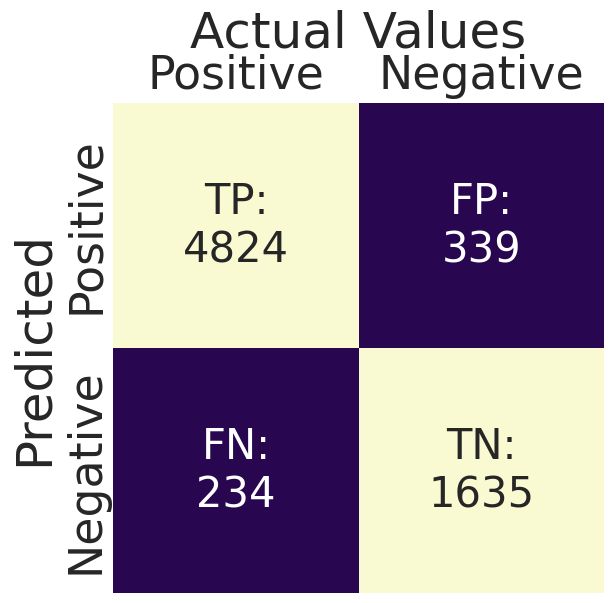

"\nconfusion_matrix = pd.crosstab(df['Churn Label'], y_predicted_lr, rownames=['Actual'], colnames=['Predicted'])\n\nsns.heatmap(confusion_matrix, annot=True)\nplt.show()\n"

In [123]:
from sklearn.metrics import confusion_matrix

trained_data = train(train_df[labels])
print(trained_data)

y_predicted_lr = lr_classifier.predict(df[labels].to_numpy())
y_predicted = [0 if x=='Yes' else 1 for x in y_predicted_lr]

# tp, fp, fn, tn = 
fp, tp, tn, fn = confusion_matrix(df['Churn Value'], y_predicted, labels=[0, 1]).ravel()

cm = [[tp, fp], [fn, tn]]
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#290750', 'lightgoldenrodyellow'], as_cmap=True),
                 annot=[[f"TP:\n{cm[0][0]:.0f}", f"FP:\n{cm[0][1]:.0f}"], [f"FN:\n{cm[1][0]:.0f}", f"TN:\n{cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
#ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='yellow', clip_on=False, zorder=0, transform=ax.transAxes))
#ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='yellow', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()


"""
confusion_matrix = pd.crosstab(df['Churn Label'], y_predicted_lr, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()
"""


In [15]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

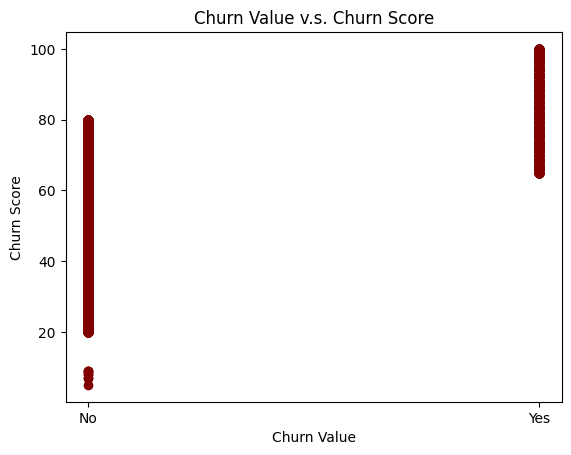

In [17]:
column_names = df.columns
# print(column_names)

churn_score = df["Churn Score"]
churn_value = df["Churn Value"]
    
plt.scatter(churn_value, churn_score, color = "maroon")

x_ticks= np.arange(0, 2, 1)
plt.xticks(x_ticks, labels=["No", "Yes"])

plt.xlabel("Churn Value")
plt.ylabel("Churn Score")

plt.title("Churn Value v.s. Churn Score")
plt.show

### Heat Map
Not used on slides

<AxesSubplot: >

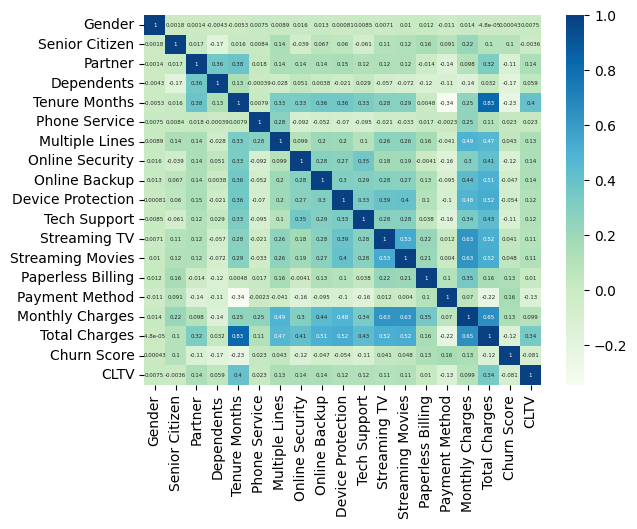

In [18]:
labels = ["Gender","Senior Citizen",
            "Partner","Dependents","Tenure Months", 
            "Phone Service", "Multiple Lines", "Online Security", 
            "Online Backup", "Device Protection",
            "Tech Support", "Streaming TV", "Streaming Movies",
            "Paperless Billing", "Payment Method",
            "Monthly Charges", "Total Charges", "Churn Score",
            "CLTV"]

focus_inputs = df[labels]

c = focus_inputs.corr()
sns.heatmap(c, cmap="GnBu", annot=True, annot_kws={"size":4})

<function matplotlib.pyplot.show(close=None, block=None)>

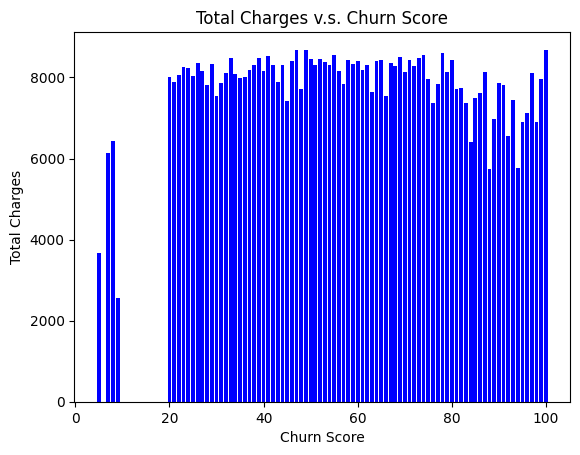

In [20]:
column_names = df.columns
# print(column_names)

churn_score = df["Churn Score"]
total_charges = df["Total Charges"]

plt.bar(churn_score, total_charges, color = "blue")
plt.xlabel("Churn Score")
plt.ylabel("Total Charges")
plt.title("Total Charges v.s. Churn Score")
plt.show

[[4.62145110e-01 2.39747634e-01 5.14195584e-01 1.51419558e-01
  3.53438486e+01 9.21135647e-01 5.47318612e-01 3.28075710e-01
  4.51104101e-01 4.88958991e-01 3.81703470e-01 5.66246057e-01
  1.74763407e+00 8.15365142e+01 2.78245166e+03 6.22728707e+01
  3.24051735e+03]
 [4.93902439e-01 1.97560976e-01 6.06097561e-01 1.96341463e-01
  5.16719512e+01 8.60975610e-01 5.45121951e-01 4.92682927e-01
  5.64634146e-01 5.70731707e-01 4.78048780e-01 5.79268293e-01
  1.42560976e+00 7.91415244e+01 3.94805695e+03 5.76048780e+01
  5.18625488e+03]
 [5.01915709e-01 2.17113665e-01 7.54789272e-01 2.28607918e-01
  6.59220945e+01 1.00000000e+00 8.60791826e-01 5.96424010e-01
  7.79054917e-01 7.77777778e-01 6.21966794e-01 8.40357599e-01
  1.27203065e+00 1.00060983e+02 6.59437663e+03 5.54942529e+01
  5.25047637e+03]
 [5.05263158e-01 1.28421053e-01 3.97368421e-01 2.22105263e-01
  2.16742105e+01 9.02631579e-01 2.98421053e-01 1.44210526e-01
  1.56315789e-01 1.46842105e-01 1.31052632e-01 1.97894737e-01
  1.80684211e+00

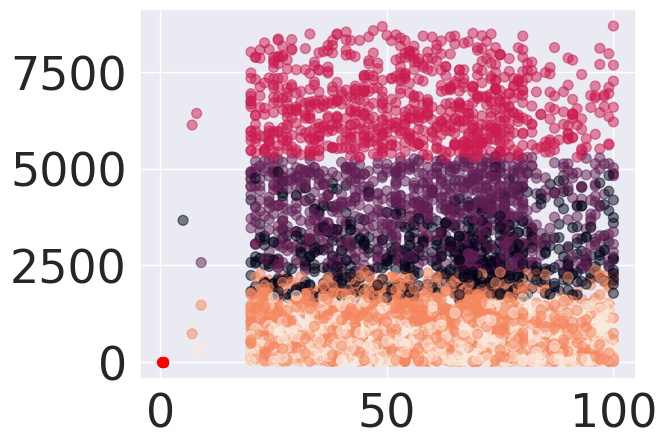

In [128]:
# k means
#kmeans = KMeans(n_clusters=3, random_state=0)
#df['cluster'] = kmeans.fit_predict(df[["Churn Score", "CLTV"]])

# get centroids
#centroids = kmeans.cluster_centers_
#cen_x = [i[0] for i in centroids] 
#cen_y = [i[1] for i in centroids]

## add to df
#df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
#colors = ['#DF2020', '#81DF20', '#2095DF']
#df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#plt.scatter(df.loc[:,"Churn Score"], df.loc[:,"CLTV"], alpha = 0.6, s=10)

kmeans = KMeans(n_clusters=5).fit(train_features)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(train_features['Churn Score'], train_features['Total Charges'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Find most common reasons for churning

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Deceased'),
  Text(0, 1, 'Poor expertise of online support'),
  Text(0, 2, 'Poor expertise of phone support'),
  Text(0, 3, 'Limited range of services'),
  Text(0, 4, 'Lack of affordable download/upload speed'),
  Text(0, 5, 'Long distance charges'),
  Text(0, 6, 'Moved'),
  Text(0, 7, 'Extra data charges'),
  Text(0, 8, 'Lack of self-service on Website'),
  Text(0, 9, 'Service dissatisfaction'),
  Text(0, 10, 'Price too high'),
  Text(0, 11, 'Product dissatisfaction'),
  Text(0, 12, 'Network reliability'),
  Text(0, 13, 'Competitor had better devices'),
  Text(0, 14, 'Attitude of service provider'),
  Text(0, 15, 'Competitor made better offer'),
  Text(0, 16, "Don't know"),
  Text(0, 17, 'Competitor offered more data'),
  Text(0, 18, 'Competitor offered higher download speeds'),
  Text(0, 19, 'Attitude of support person')])

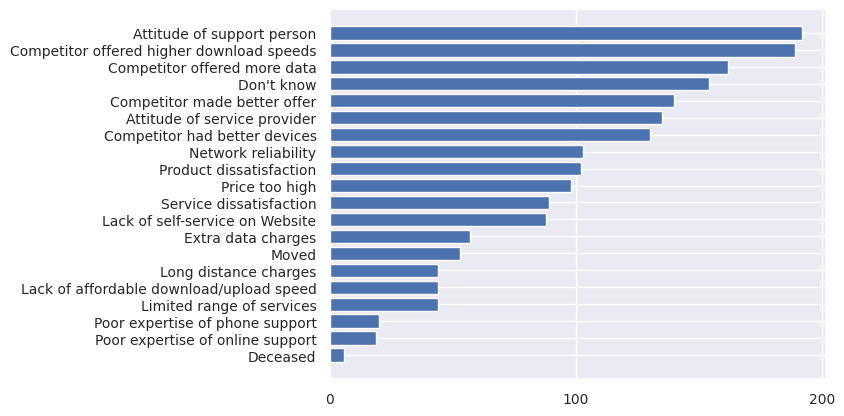

In [138]:
#plt.scatter(df['Churn Score'] , df['Churn Reason'].astype('str'))
df["Churn Reason"].describe()
most_common_reason = {}
for reason in df["Churn Reason"]:
    if reason not in most_common_reason:
        most_common_reason[reason] = 1
    else:
        most_common_reason[reason] += 1

most_common_reason.popitem()  # remove nan

sorted_values = sorted(most_common_reason.values())
sorted_most_common_reason = {}

for i in sorted_values:
    for k in most_common_reason.keys():
        if most_common_reason[k] == i:
            sorted_most_common_reason[k] = most_common_reason[k]

reason = list(sorted_most_common_reason.keys())
count = list(sorted_most_common_reason.values())

plt.barh(range(len(sorted_most_common_reason)), count, tick_label = reason)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [0]:
df_1 = _deepnote_execute_sql('SELECT *\nFROM \'Telco_customer_churn.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b45ac0f9-86e7-445f-838f-48ab2d2fe52b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>